# Hyperbolic Gaussian Distribution Estimation in the Poincaré Disk

This notebook demonstrates how to estimate and visualize a Gaussian distribution in hyperbolic space using the Poincaré disk model. The process involves several key steps:

1. *Sample Generation:*

- Create points following a 2D Gaussian distribution
- Filter points to ensure they lie within the unit disk

2. *Hyperbolic Statistics:*

- Compute the hyperbolic barycenter by converting between Poincaré and Klein disk models
- Project points to the tangent space at the barycenter
- Estimate the covariance matrix in the tangent space

3. *Distribution Visualization:*

- Generate a grid in the Poincaré disk
- Compute the probability density function (PDF)
- Create a contour plot showing the distribution

This methodology is crucial for statistical analysis in hyperbolic space, particularly when working with embedded data that exhibits hierarchical or tree-like structures. The visualization helps understand how Gaussian distributions behave in non-Euclidean geometry.

*Note:* The approach uses the tangent space at the barycenter for PDF computation, as probability distributions in hyperbolic space require careful handling of the curved geometry.

### Import librairies 

In [1]:
# Required Libraries
import src.Tools as tl         # Custom tools for hyperbolic geometry operations
import numpy as np            # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
from scipy.stats import multivariate_normal  # For Gaussian distribution calculations


### Barycenter estimation 

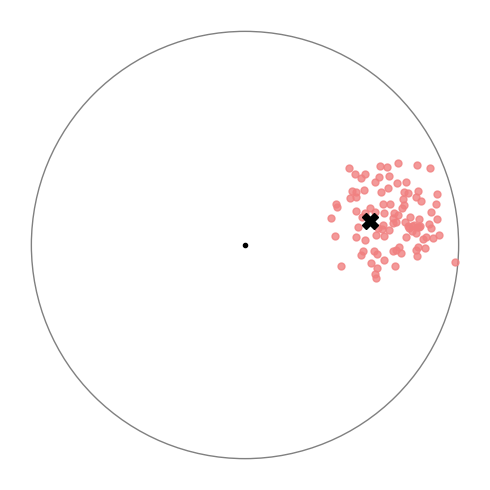

In [2]:
## Generate synthetic data points in the Poincaré disk
#np.random.seed(42)  # Uncomment for reproducibility
# Create points following a multivariate normal distribution
data = np.random.multivariate_normal(mean=[0.7, 0.1], cov=[[0.02, 0], [0, 0.02]], size=100)

# Filter points to keep only those inside the unit disk (Poincaré disk boundary)
def in_disk(x, y, r=1):
    return np.sqrt(x**2 + y**2) <= r
data = data[in_disk(data[:, 0], data[:, 1])]

## Compute the hyperbolic barycenter of the points

# Step 1: Convert points from Poincaré disk to Klein disk model
data_k = tl.Poincare_to_Klein(data)

# Step 2: Compute the barycenter in Klein disk (easier in this model)
barycenter_k = tl.Klein_baycenter(data_k)

# Step 3: Convert the barycenter back to Poincaré disk model
barycenter_p = tl.Klein_to_Poincare(np.array([barycenter_k]))[0]

## Visualization
# Create a new figure with specified size
fig = plt.figure(figsize=(5, 5))
plt.rcParams['axes.linewidth'] = 2  # Make axes lines thicker

# Setup the plotting area
ax1 = fig.add_subplot(111)

# Plot the origin (center of the disk)
ax1.plot([0], [0], 'o', color='black', markersize=3)

# Draw the unit circle (boundary of Poincaré disk)
circle = plt.Circle((0, 0), 1, edgecolor='gray', facecolor='none', linewidth=1)
ax1.add_artist(circle)

# Plot data points in light red with transparency
ax1.plot(data[:, 0], data[:, 1], 'o', color='lightcoral', markersize=5, alpha=0.8)

# Plot the computed hyperbolic barycenter as a red cross
ax1.plot(barycenter_p[0], barycenter_p[1], 'X', color='k', markersize=12)

# Configure plot aesthetics
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.axis("off")  # Hide axes for cleaner visualization
ax1.set_aspect('equal', 'box')  # Ensure circular appearance

# Adjust layout and display
fig.tight_layout()
plt.show()


### Gaussian distributio estimation 

/Users/martin.guillemaud/ownCloud - GUILLEMAUD Martin (martin.guillemaud@icm-institute.org)@owncloud.icm-institute.org/PhD/MUTLI_coal_Hepa/MultiHypEmb/CodePaper/Code_final/MLNHypEmb/src/Tools.py:314: RuntimeWarning: invalid value encountered in arctanh
  log_map = 2/lambda_t*np.arctanh(np.linalg.norm(Mobius_addition(-pos_t, pos_p)))*Mobius_addition(-pos_t, pos_p)/np.linalg.norm(Mobius_addition(-pos_t, pos_p))


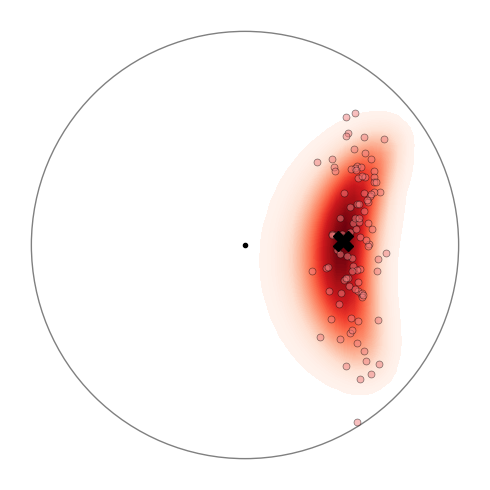

In [3]:
## 1. Data Generation and Preprocessing
#np.random.seed(42)  # Optional: Set seed for reproducibility
# Generate points from a 2D normal distribution with specified parameters
data = np.random.multivariate_normal(mean=[0.5, 0.01], cov=[[0.005, 0], [0, 0.08]], size=100)

# Filter points to keep only those within the unit disk (Poincaré disk boundary)
def in_disk(x, y, r=1):
    return np.sqrt(x**2 + y**2) <= r
data = data[in_disk(data[:, 0], data[:, 1])]

## 2. Barycenter Estimation Process
# Convert data points from Poincaré disk to Klein disk for easier barycenter computation
data_k = tl.Poincare_to_Klein(data)
# Compute the barycenter in Klein disk model
barycenter_k = tl.Klein_baycenter(data_k)
# Convert barycenter back to Poincaré disk model
barycenter_p = tl.Klein_to_Poincare(np.array([barycenter_k]))[0]

## 3. Covariance Matrix Estimation
# Project all points to tangent space centered at barycenter
data_t = [tl.Logarithmic_map(barycenter_p, x) for x in data]
data_t = np.array(data_t)
# Compute covariance matrix in tangent space
cov_matrix = np.cov(data_t, rowvar=False)

## 4. Grid Creation for PDF Visualization
# Create a regular grid in the disk
n_grid = 50 
x = np.linspace(-1, 1, n_grid)
y = np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(x, y)
pos_grid = np.array([X.flatten(), Y.flatten()]).T

# Project grid points to tangent space
pos_grid_t = [tl.Logarithmic_map(barycenter_p, x) for x in pos_grid]
pos_grid_t = np.array(pos_grid_t)

## 5. PDF Computation
# Initialize Gaussian distribution with computed parameters
gaussian = multivariate_normal(mean=[0,0], cov=cov_matrix)
# Compute PDF values for grid points
pdf = gaussian.pdf(pos_grid_t).reshape(X.shape)

# Apply disk mask to PDF values
mask = np.sqrt(X**2 + Y**2) <= 1
pdf_masked = np.where(mask, pdf, 0)
X_masked = np.where(mask, X, np.nan)
Y_masked = np.where(mask, Y, np.nan)

## 6. Visualization
# Initialize figure
fig = plt.figure(figsize=(5, 5))
plt.rcParams['axes.linewidth'] = 2
ax1 = fig.add_subplot(111)

# Plot PDF contours
ax1.contourf(X_masked, Y_masked, pdf_masked, levels=100, cmap='Reds', alpha=1)

# Plot disk center and boundary
ax1.plot([0], [0], 'o', color='black', markersize=3)
circle = plt.Circle((0, 0), 1, edgecolor='gray', facecolor='none', linewidth=1)
ax1.add_artist(circle)

# Plot data points and barycenter
ax1.plot(data[:, 0], data[:, 1], 'o', color='lightcoral', markersize=5,
         alpha=0.5, markeredgecolor='black', markeredgewidth=0.5)
ax1.plot(barycenter_p[0], barycenter_p[1], 'X', color='k', markersize=15)

# Configure plot aesthetics
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.axis("off")
ax1.set_aspect('equal', 'box')
fig.tight_layout()
plt.show()
